# Global Knowledge Graph

The Global Knowledge Graph (GKG) connects every person, organization, location, count, theme, news source, and event across the planet into a single massive network that captures what is happening around the world as well as the event context, the people involved and their perceptions and opinions towards the occuring events every single day. The GKG comprises several indicators that capture the latent dimensions of society that precede physical unrest. The GKG further allows users to move beyond just positive/negative tone towards a far richer and more diverse ecosystem of emotional measures. 

Included in the GKG is the <b>Global Content Analysis Measures (GCAM)</b> system that runs each document through an array of content analysis systems to assess several thousand latent dimensions for each article.

While the GKG's global scope has enabled truly unimaginable new applications, due to the vast number of use cases articulated for the GKG and unlike the primary GDELT event stream which is designed for direct import into major statistical packages like R, the GKG file format requires sophisticated pre-processing. This notebook demonstrates how to to extract and reprocess the GKG data for import into a statistical package, using Python as the scripting language.

In [1]:
# Import useful libraries
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from collections import Counter
from collections import OrderedDict 
pd.set_option('display.max_colwidth', -1) 
%matplotlib inline 
# Declare global variables
gkg_sample = pd.read_csv('gkg_sample.csv').sort_values('GKGRECORDID', ascending=1)
#gkg_sample.head(1)

In [6]:
gkg_sample.columns

Index(['GKGRECORDID', 'DATE', 'SourceCollectionIdentifier', 'SourceCommonName',
       'DocumentIdentifier', 'Counts', 'V2Counts', 'Themes', 'V2Themes',
       'Locations', 'V2Locations', 'Persons', 'V2Persons', 'Organizations',
       'V2Organizations', 'V2Tone', 'Dates', 'GCAM', 'SharingImage',
       'RelatedImages', 'SocialImageEmbeds', 'SocialVideoEmbeds', 'Quotations',
       'AllNames', 'Amounts', 'TranslationInfo', 'Extras'],
      dtype='object')

## GKG Types

Index(['Type', 'Name', 'Date Added', 'Modified History', 'Description'], dtype='object')
OrderedDict([('Theme', 260), ('Taxonomy', 12), ('Count', 11)])


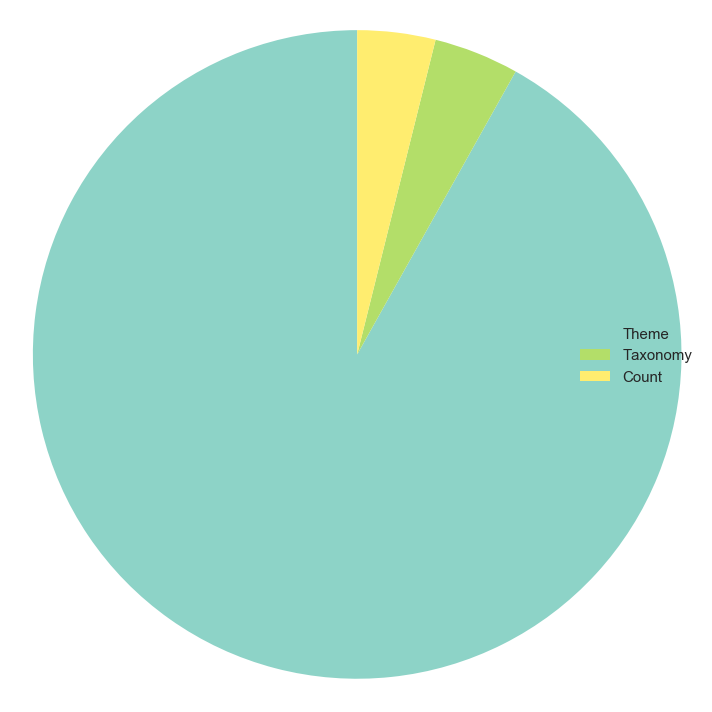

In [31]:
gkg_categories = pd.read_csv('gkg_category_list.csv')
print(gkg_categories.columns)
GKGTypes = OrderedDict(sorted(Counter(gkg_categories.Type).items(), key=lambda x: x[1], reverse=True))
labels = [key for key in list(GKGTypes.keys())]
sizes = list(GKGTypes.values())
print(GKGTypes)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax = plt.subplots(figsize=(10, 10))
plt.style.use('seaborn-paper')
colors = cm.Set3(np.linspace(0, 1, len(labels)))
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="right", fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

## GKG Themes, Counts & Taxonomies

OrderedDict([('TAX_FNCACT', 9710), ('WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE', 8785), ('EPU_POLICY', 8754), ('GENERAL_GOVERNMENT', 8640), ('WB_2433_CONFLICT_AND_VIOLENCE', 8468), ('TAX_ETHNICITY', 8413), ('TAX_TERROR_GROUP', 8253), ('EPU_POLICY_GOVERNMENT', 8205), ('LEADER', 8005), ('USPEC_POLITICS_GENERAL1', 7861), ('TAX_FNCACT_PRESIDENT', 7423), ('TAX_TERROR_GROUP_FARC', 6913), ('WB_2445_NON_STATE_SECURITY_ACTORS', 6868), ('WB_2451_REBELS_GUERRILLAS_AND_INSURGENTS', 6654), ('EPU_CATS_NATIONAL_SECURITY', 6649), ('ARMEDCONFLICT', 6320), ('TAX_ETHNICITY_COLOMBIAN', 6276), ('CRISISLEX_CRISISLEXREC', 5973), ('CRISISLEX_C07_SAFETY', 5383), ('TERROR', 5324), ('WB_696_PUBLIC_SECTOR_MANAGEMENT', 5112), ('WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT', 4632), ('EPU_POLICY_POLITICAL', 4587), ('TAX_WORLDLANGUAGES', 4413), ('KILL', 4376), ('TAX_TERROR_GROUP_REVOLUTIONARY_ARMED_FORCES', 4336), ('WB_2471_PEACEKEEPING', 4282), ('CEASEFIRE', 4269), ('TAX_FNCACT_LEADER', 4048), ('TAX_TERROR_GROUP_R

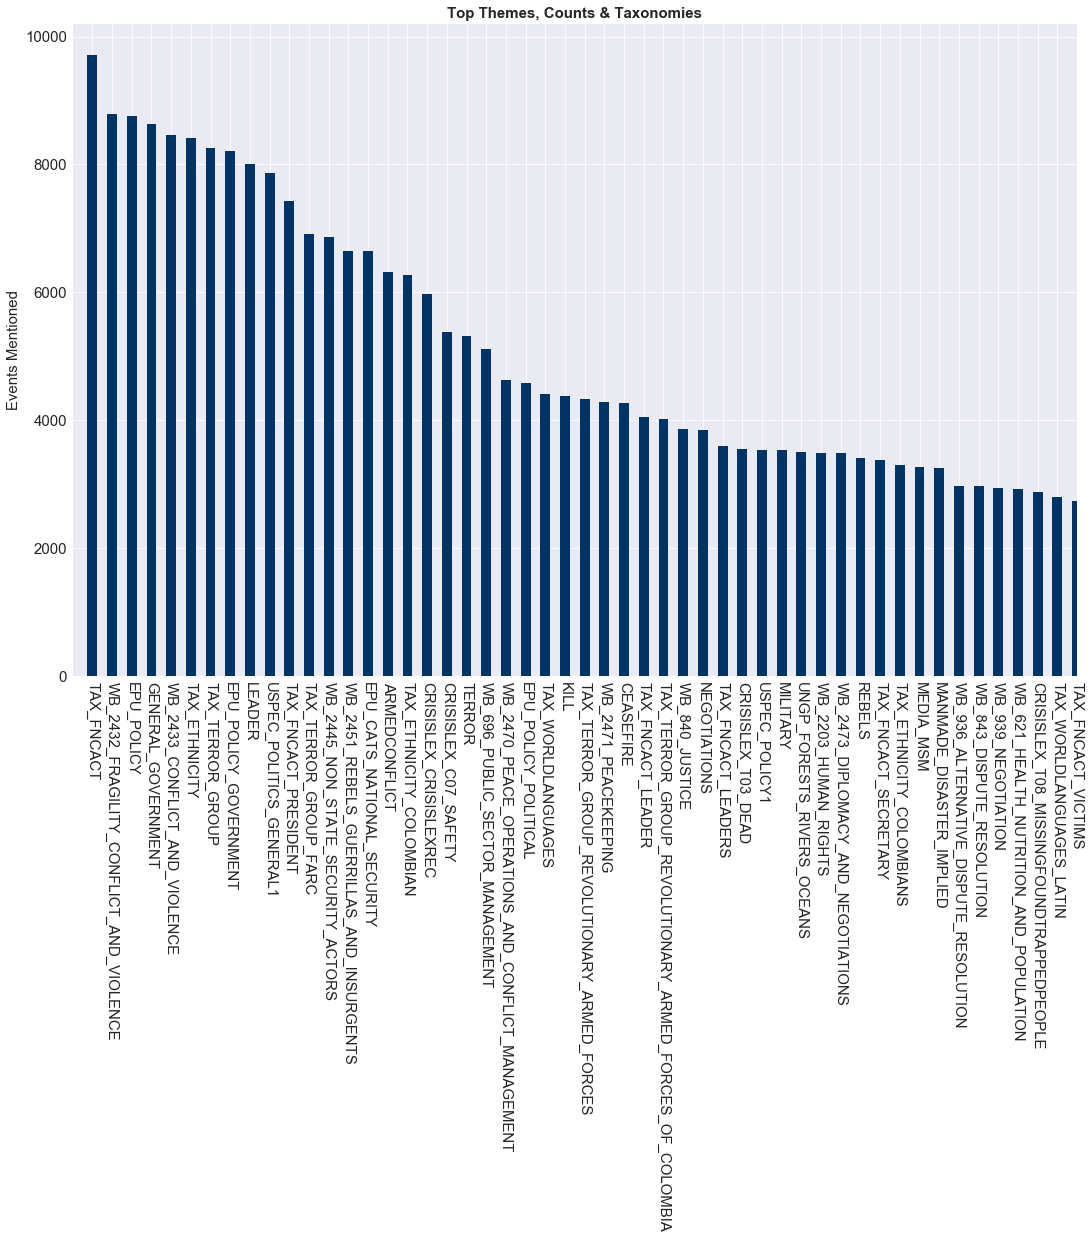

In [32]:
themes = []
for theme in gkg_sample.Themes:
    themes += str(theme).split(';')
    
themes = OrderedDict(sorted(dict(Counter(themes).most_common(100)).items(), key=lambda x: x[1], reverse=True))

del themes['']
print(themes)
labels = list(themes.keys())
values = list(themes.values())
     
ind = np.arange(len(values)) 

width = 0.5

fig, ax = plt.subplots(figsize=(18, 12))
plt.style.use('seaborn-paper')
ax.set_title('Top Themes, Counts & Taxonomies', fontsize=15, fontweight='bold')
ax.set_ylabel('Events Mentioned' , fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.bar(ind, values, width, color='#003366')
#ax.set_yticks(np.arange(0, 5500, 100))
ax.set_xticks(np.arange(0, len(labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
#plt.xticks(ind + width*.5)
#ax.set_xticklabels(labels)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::1])
plt.xlim([-1,50])
plt.show()


## Most Prominent Actors

OrderedDict([('juan manuel santos', 3453), ('john kerry', 2242), ('alvaro uribe', 1328), ('rodrigo londono', 1288), ('john emmanuel', 1070), ('barack obama', 869), ('federica mogherini', 858), ('li keqiang', 687), ('hillary clinton', 662), ('timoleon jimenez', 539), ('robert mugabe', 537), ('donald trump', 488), ('ivan marquez', 437), ('michel temer', 410), ('shinzo abe', 408), ('bashar assad', 405), ('raul castro', 404), ('christine lagarde', 404), ('cardinal pietro parolin', 403), ('nicolas maduro', 402), ('sarwar danesh', 396), ('gulbuddin helmatyar', 395), ('abdulaziz al-saud', 370), ('rodrigo echeverri', 359), ('suu kyi', 341), ('petro poroshenko', 337), ('vivian salama', 336), ('nawaz sharif', 334), ('el nacional', 320), ('peter claver', 316), ('libardo cardona', 289), ('ingrid betancourt', 283), ('el espectador', 280), ('rafael ramirez', 268), ('pietro parolin', 260), ('alfonso cano', 259), ('muhammadu buhari', 255), ('haider al-abadi', 252), ('hugo chavez', 250), ('borge brende

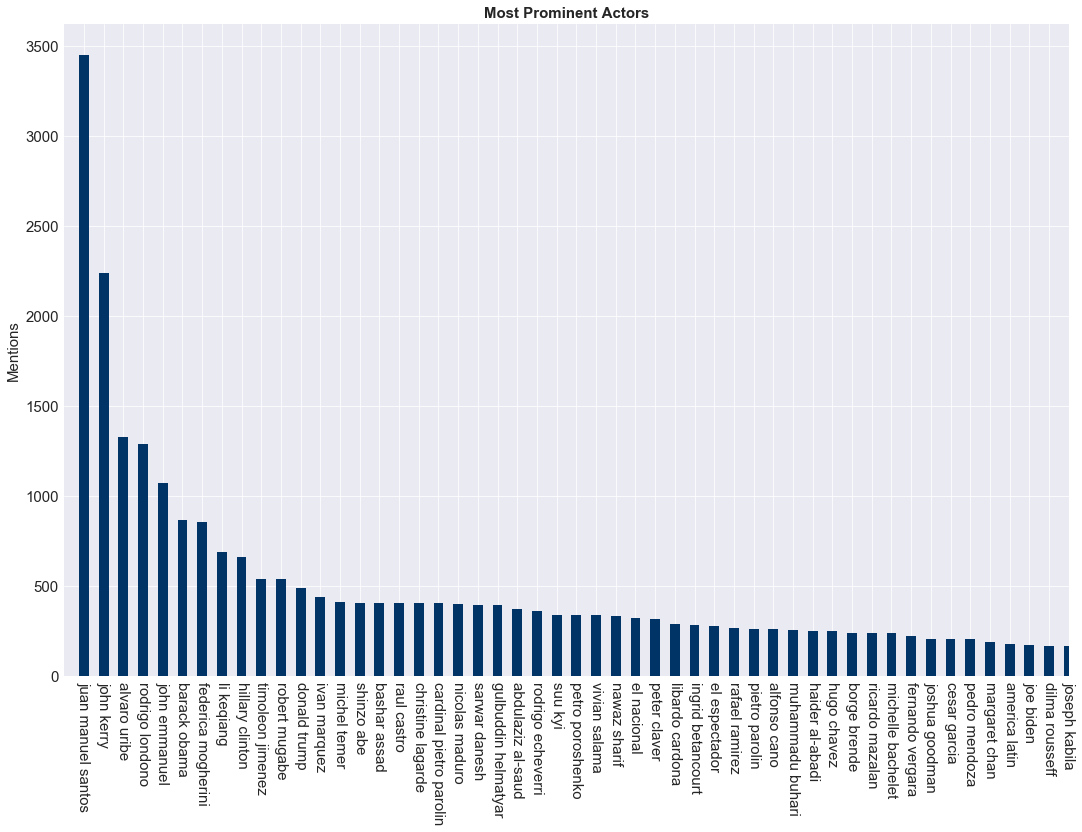

In [33]:
people = []
for persons in gkg_sample.Persons:
    people += str(persons).split(';')
    
people = OrderedDict(sorted(dict(Counter(people).most_common(100)).items(), key=lambda x: x[1], reverse=True))

del people['nan']
print(people)
labels = list(people.keys())
values = list(people.values())
     
ind = np.arange(len(values)) 

width = 0.5

fig, ax = plt.subplots(figsize=(18, 12))
plt.style.use('seaborn-paper')
ax.set_title('Most Prominent Actors', fontsize=15, fontweight='bold')
ax.set_ylabel('Mentions' , fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.bar(ind, values, width, color='#003366')
#ax.set_yticks(np.arange(0, 5500, 100))
ax.set_xticks(np.arange(0, len(labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
#plt.xticks(ind + width*.5)
#ax.set_xticklabels(labels)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::1])
plt.xlim([-1,50])
plt.show()


## Global Content Analysis Measurement (GCAM)

In [51]:
# wc must be word count for entire document
list(gkg_sample.GCAM.head(1))[0].split(',')[4]

'c12.10:73'